In [3]:
from google.colab import files

uploaded = files.upload()

Saving pokemon_images.csv to pokemon_images.csv


In [4]:
import pandas as pd
data  = pd.read_csv('pokemon_images.csv')
data .head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [5]:
# Checking for missing values
missing_values = data.isnull().sum()

# Data types and unique values for categorical columns
data_types = data.dtypes
unique_values = data.nunique()

missing_values, data_types, unique_values


(Name       0
 Type1      0
 Type2    404
 dtype: int64,
 Name     object
 Type1    object
 Type2    object
 dtype: object,
 Name     809
 Type1     18
 Type2     18
 dtype: int64)

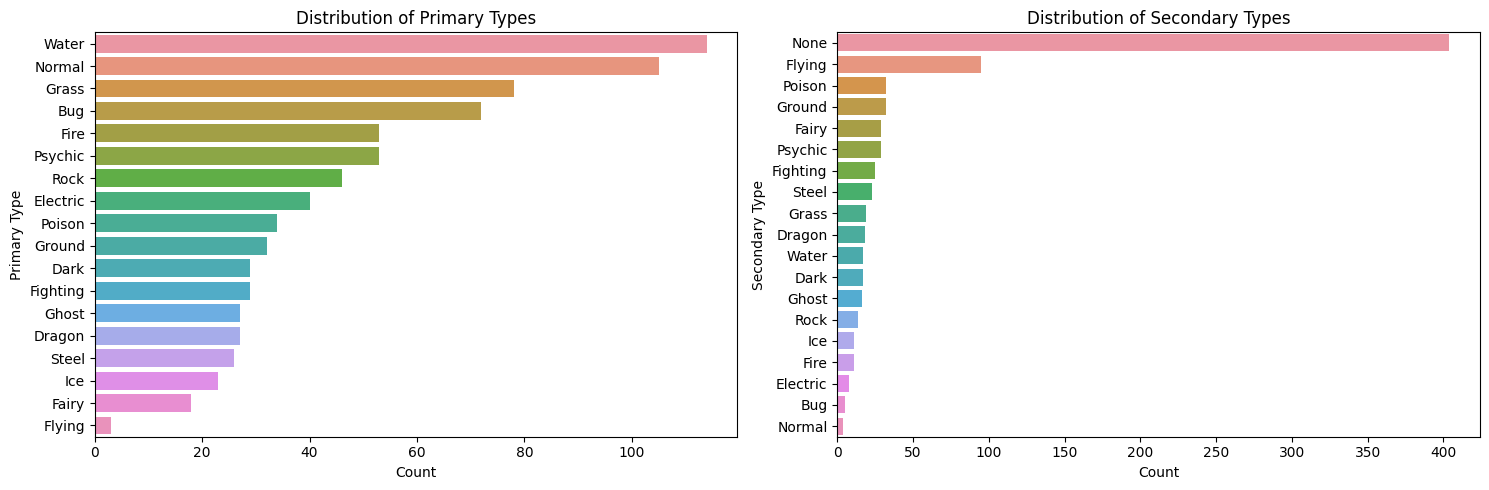

,Name,Type1,Type2
count,809,809,809
unique,809,18,19
top,bulbasaur,Water,None
freq,1,114,404


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values in "Type2" column
data['Type2'].fillna('None', inplace=True)

# Generate descriptive statistics
desc_stats = data.describe(include='all')

# Visualizations
plt.figure(figsize=(15, 5))

# Distribution of Primary Types
plt.subplot(1, 2, 1)
sns.countplot(data=data, y='Type1', order = data['Type1'].value_counts().index)
plt.title('Distribution of Primary Types')
plt.xlabel('Count')
plt.ylabel('Primary Type')

# Distribution of Secondary Types
plt.subplot(1, 2, 2)
sns.countplot(data=data, y='Type2', order = data['Type2'].value_counts().index)
plt.title('Distribution of Secondary Types')
plt.xlabel('Count')
plt.ylabel('Secondary Type')

plt.tight_layout()
plt.show()

desc_stats

In [8]:
from PIL import Image
import numpy as np
import os

# Directory where images are stored
image_dir = 'Images'

# List of image files
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]
image_files.sort()

# Display the first few image files
image_files[:10]


['abomasnow.png',
 'abra.png',
 'absol.png',
 'accelgor.png',
 'aegislash-blade.png',
 'aerodactyl.png',
 'aggron.png',
 'aipom.png',
 'alakazam.png',
 'alomomola.png']

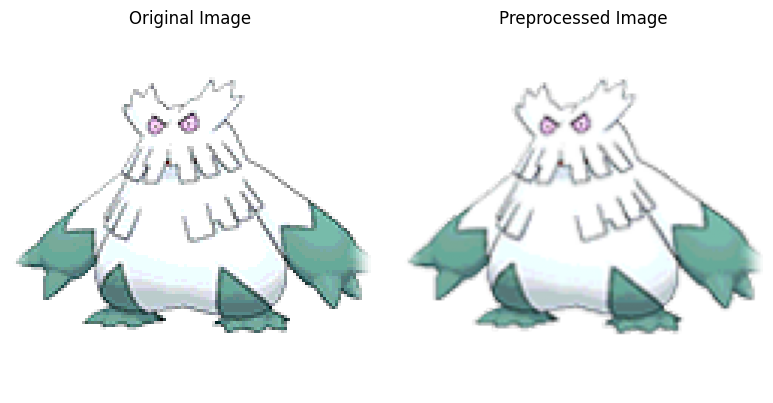

In [9]:
import matplotlib.pyplot as plt

# Function to preprocess an image
def preprocess_image(image_path, size=(128, 128)):
    """
    Load an image, resize it, normalize pixel values, and optionally convert to grayscale.

    :param image_path: Path to the image file
    :param size: Tuple (width, height) representing the target size of the image
    :return: Preprocessed image as a numpy array
    """
    # Load the image
    img = Image.open(image_path)

    # Resize the image
    img_resized = img.resize(size)

    # Normalize pixel values
    img_normalized = np.array(img_resized) / 255.0

    return img_normalized

# Preprocess the first image
first_image_path = os.path.join(image_dir, image_files[0])
preprocessed_img = preprocess_image(first_image_path)

# Display the original and preprocessed image
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(Image.open(first_image_path))
plt.title('Original Image')
plt.axis('off')

# Preprocessed image
plt.subplot(1, 2, 2)
plt.imshow(preprocessed_img)
plt.title('Preprocessed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


In [10]:
# Filter out non-image files
image_files = [f for f in image_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Apply the preprocessing steps to all images and store them in a list
preprocessed_images = [preprocess_image(os.path.join(image_dir, img_file)) for img_file in image_files]

# Checking the shape of the preprocessed images to ensure uniformity
image_shapes = [img.shape for img in preprocessed_images]
set(image_shapes)


{(128, 128), (128, 128, 3), (128, 128, 4)}

In [11]:
# Function to preprocess an image and convert it to RGB
def preprocess_image_rgb(image_path, size=(128, 128)):
    """
    Load an image, resize it, normalize pixel values, convert to RGB, and optionally convert to grayscale.

    :param image_path: Path to the image file
    :param size: Tuple (width, height) representing the target size of the image
    :return: Preprocessed image as a numpy array
    """
    # Load the image
    img = Image.open(image_path)

    # Convert to RGB
    img_rgb = img.convert('RGB')

    # Resize the image
    img_resized = img_rgb.resize(size)

    # Normalize pixel values
    img_normalized = np.array(img_resized) / 255.0

    return img_normalized

# Apply the preprocessing and RGB conversion to all images
preprocessed_images_rgb = [preprocess_image_rgb(os.path.join(image_dir, img_file)) for img_file in image_files]

# Checking the shape of the preprocessed images to ensure uniformity
image_shapes_rgb = [img.shape for img in preprocessed_images_rgb]
set(image_shapes_rgb)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


{(128, 128, 3)}

In [12]:
import cv2
def extract_color_histogram(image, bins=(8, 8, 8)):
    """
    Extract a color histogram from the image.

    :param image: Numpy array representing the image.
    :param bins: Number of bins for the histogram.
    :return: Flattened histogram as a numpy array.
    """
    # Convert image to [0, 255] range and change data type to uint8
    image_uint8 = (image * 255).astype('uint8')

    # Compute the color histogram
    hist = cv2.calcHist([image_uint8], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])

    # Normalize the histogram
    cv2.normalize(hist, hist)

    # Return the histogram as a flattened array
    return hist.flatten()

# Extract color histograms from all images again
color_histograms = [extract_color_histogram(img) for img in preprocessed_images_rgb]

# Checking the shape of the extracted features to ensure uniformity
feature_shapes = [hist.shape for hist in color_histograms]
set(feature_shapes)


{(512,)}

In [13]:
# Create a DataFrame from the color histograms
color_histograms_df = pd.DataFrame(color_histograms, columns=[f'color_hist_{i}' for i in range(512)])

# Extract Pokémon names from image file names (assuming the format is "{pokemon_name}.png")
pokemon_names = [img_file.split('.')[0] for img_file in image_files]

# Add Pokémon names to the DataFrame
color_histograms_df['Name'] = pokemon_names

# Merge the color histograms DataFrame with the existing Pokémon dataset
merged_data = pd.merge(data, color_histograms_df, on='Name', how='inner')

merged_data.head()


,Name,Type1,Type2,color_hist_0,color_hist_1,color_hist_2,color_hist_3,color_hist_4,color_hist_5,color_hist_6,...,color_hist_502,color_hist_503,color_hist_504,color_hist_505,color_hist_506,color_hist_507,color_hist_508,color_hist_509,color_hist_510,color_hist_511
0,bulbasaur,Grass,Poison,0.999564,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000068,0.000068,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000749
1,ivysaur,Grass,Poison,0.999282,0.000215,0.0,0.0,0.0,0.0,0.0,...,0.000359,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000717
2,venusaur,Grass,Poison,0.997104,0.000257,0.0,0.0,0.0,0.0,0.0,...,0.002823,0.001112,0.000000,0.0,0.0,0.0,0.000513,0.000086,0.000171,0.005304
3,charmander,Fire,None,0.999670,0.000068,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000271,0.0,0.0,0.0,0.000610,0.009833,0.001153,0.000339
4,charmeleon,Fire,None,0.999479,0.000070,0.0,0.0,0.0,0.0,0.0,...,0.001187,0.000000,0.000279,0.0,0.0,0.0,0.000000,0.000070,0.010192,0.001885


In [14]:
# Summary statistics for the dataset
summary_stats = merged_data.describe()

# Distribution of Pokémon Types
type1_distribution = merged_data['Type1'].value_counts()
type2_distribution = merged_data['Type2'].value_counts()

summary_stats, type1_distribution, type2_distribution


(       color_hist_0  color_hist_1  color_hist_2  color_hist_3  color_hist_4  \
 count    809.000000    809.000000    809.000000    809.000000  8.090000e+02   
 mean       0.889234      0.000455      0.000043      0.000003  8.029652e-08   
 std        0.310291      0.001427      0.000350      0.000027  2.283868e-06   
 min        0.000000      0.000000      0.000000      0.000000  0.000000e+00   
 25%        0.995807      0.000000      0.000000      0.000000  0.000000e+00   
 50%        0.998848      0.000131      0.000000      0.000000  0.000000e+00   
 75%        0.999546      0.000356      0.000000      0.000000  0.000000e+00   
 max        0.999955      0.019627      0.007912      0.000529  6.495989e-05   
 
        color_hist_5  color_hist_6  color_hist_7  color_hist_8  color_hist_9  \
 count         809.0         809.0         809.0    809.000000    809.000000   
 mean            0.0           0.0           0.0      0.000164      0.000602   
 std             0.0           0.0    

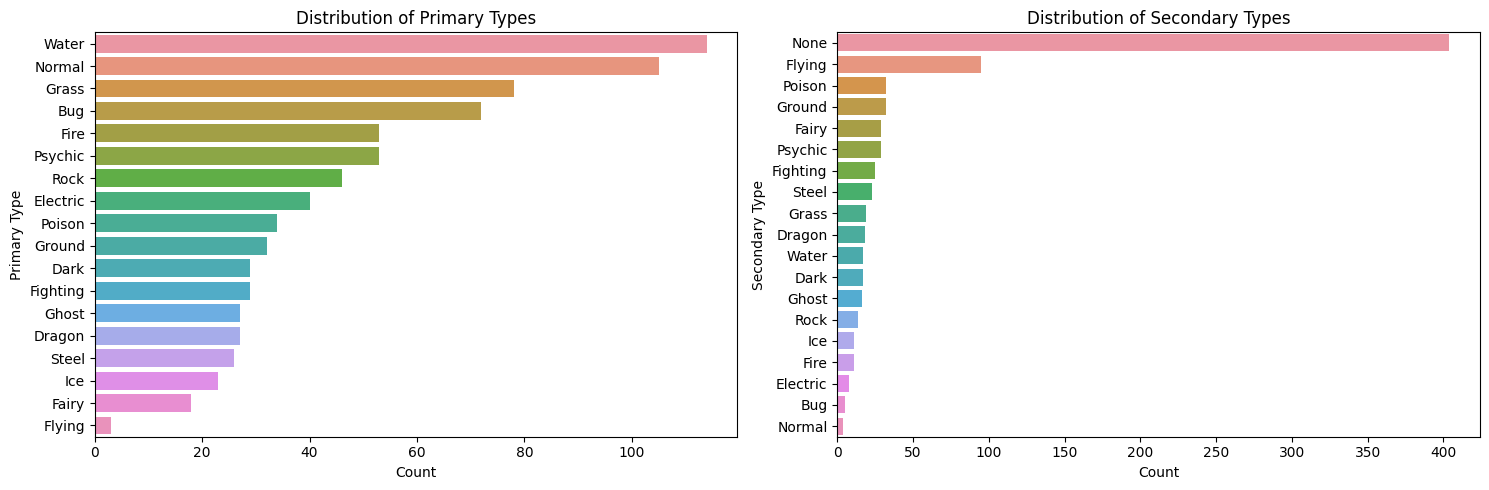

In [15]:
# Distribution of Pokémon Primary Types
plt.figure(figsize=(15, 5))

# Distribution of Primary Types
plt.subplot(1, 2, 1)
sns.countplot(data=merged_data, y='Type1', order = merged_data['Type1'].value_counts().index)
plt.title('Distribution of Primary Types')
plt.xlabel('Count')
plt.ylabel('Primary Type')

# Distribution of Secondary Types
plt.subplot(1, 2, 2)
sns.countplot(data=merged_data, y='Type2', order = merged_data['Type2'].value_counts().index)
plt.title('Distribution of Secondary Types')
plt.xlabel('Count')
plt.ylabel('Secondary Type')

plt.tight_layout()
plt.show()


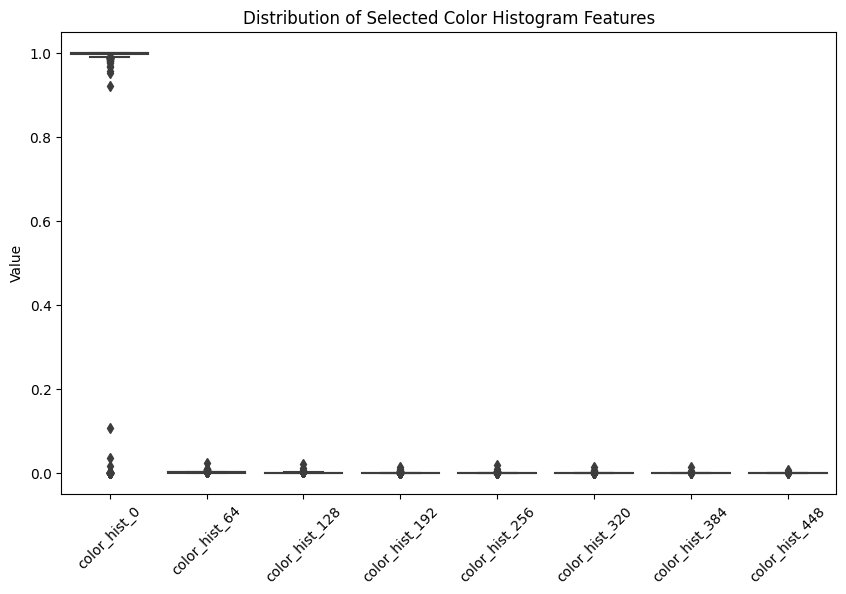

In [16]:
# Select a subset of color histogram features to visualize
selected_features = ['color_hist_0', 'color_hist_64', 'color_hist_128', 'color_hist_192', 'color_hist_256', 'color_hist_320', 'color_hist_384', 'color_hist_448']

# Create box plots to visualize the distribution of the selected features
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data[selected_features])
plt.title('Distribution of Selected Color Histogram Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the "Type1" column
label_encoder = LabelEncoder()
merged_data['Type1_encoded'] = label_encoder.fit_transform(merged_data['Type1'])

# Features and target variable
X = merged_data.drop(columns=['Name', 'Type1', 'Type2', 'Type1_encoded'])
y = merged_data['Type1_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the dimensions of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((647, 512), (162, 512), (647,), (162,))

In [21]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Defining the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier()
}

# Perform cross-validation and store the results
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    results[name] = scores.mean()

results


{'Logistic Regression': 0.1446438156583084,
 'Random Forest': 0.32134038800705467,
 'SVC': 0.14091710758377424,
 'KNN': 0.17541599570585076}

**Cross-Validation Results:**
* Logistic Regression: 14.46%
* Random Forest: 32.13%
* SVC (Support Vector Classifier): 14.09%
* KNN (K-Nearest Neighbors): 17.54%

**Observations:**
* The Random Forest classifier has achieved the highest accuracy among the models, though the accuracy is still relatively low.
* The dataset is small and the task is challenging, which could explain the low accuracy scores.

In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search model
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='accuracy',
                              verbose=2)

# Fit the grid search model
grid_search_rf.fit(X, y)

# Results
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_rf, best_score_rf


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=

({'max_depth': 20,
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 200},
 0.3299976995629169)

**Tuned Random Forest Classifier Results:**
* **Best Parameters:**
* max_depth: 20
* min_samples_leaf: 2
* min_samples_split: 5
* n_estimators: 200
* **Best Score:** 32.99% accuracy

The accuracy has slightly improved with the tuned hyperparameters compared to the initial run of the Random Forest classifier.